In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CREATE DATAFRAME
df = pd.read_excel("Health Insurance Dataset.xlsx")

df.head()

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19,female,27.900,0,yes,southwest,16884.92400,B,72
1,18,male,33.770,1,no,southeast,1725.55230,C,69
2,28,male,33.000,3,no,southeast,4449.46200,B,90
3,33,male,22.705,0,no,northwest,21984.47061,A,47
4,32,male,28.880,0,no,northwest,3866.85520,C,76


Age statistics:
 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


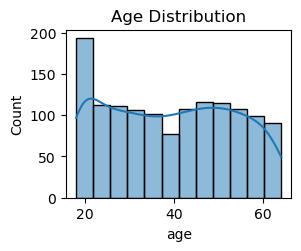

In [2]:
# Age Histogram
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
print("Age statistics:\n",df['age'].describe())

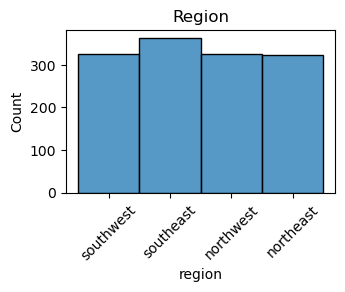

In [53]:
plt.subplot(2,2, 1)
sns.histplot(df['region'])
plt.title('Region')
plt.xticks(rotation=45)
plt.tight_layout()

bmi statistics:
 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


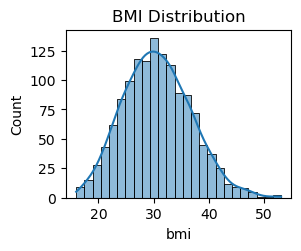

In [41]:
# BMI Histogram
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
print("bmi statistics:\n",df['bmi'].describe())


Sex Distribution:
 sex
male      676
female    662
Name: count, dtype: int64


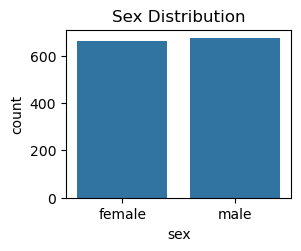

In [42]:
# Sex Bar Chart
sex_counts = df['sex'].value_counts()
plt.subplot(2, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
print("Sex Distribution:\n", sex_counts)

Smoker Distribution:
 smoker
no     1064
yes     274
Name: count, dtype: int64


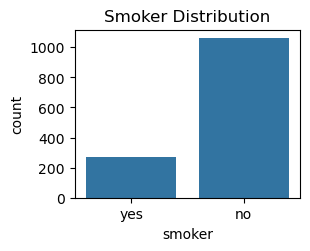

In [43]:
# Smoker Bar Chart 
smoker_counts = df['smoker'].value_counts()
plt.subplot(2, 2, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
print("Smoker Distribution:\n", smoker_counts)